In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/



In [ ]:
!kaggle datasets download -d moltean/fruits


100% 1.28G/1.28G [00:10<00:00, 182MB/s]
100% 1.28G/1.28G [00:10<00:00, 126MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/fruits.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
train_path = "/content/fruits-360_dataset/fruits-360/Training"
test_path  = "/content/fruits-360_dataset/fruits-360/Test"

In [ ]:
from keras.applications import VGG16

In [ ]:
import numpy as mp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow

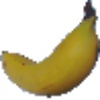

(100, 100, 3)

In [ ]:
img = cv2.imread("/content/fruits-360_dataset/fruits-360/Training/Banana/0_100.jpg")
cv2_imshow(img)
img.shape



In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense

In [ ]:
model = Sequential()

model.add(Conv2D(128,kernel_size =(3,3),padding='valid',activation='relu',input_shape=(100,100,3)))


model.add(Conv2D(64,kernel_size =(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size =(2,2),strides =2,padding='valid'))


model.add(Conv2D(32,kernel_size =(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size =(2,2),strides =2,padding='valid'))
model.add(Dropout(0.5))



model.add(Flatten())

model.add(Dense(5000,activation='relu'))

model.add(Dense(1000,activation='relu'))

model.add(Dense(131,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 128)       3584      
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 64)        73792     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 23, 23, 32)        0

In [ ]:
model.compile(loss = "categorical_crossentropy" ,optimizer = "SGD" ,metrics = ['accuracy'])
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
                    rescale =1./255,
                    shear_range=0.3,
                    zoom_range=0.3,
                    horizontal_flip=True,
                    fill_mode='nearest'

)

test_datagen  = ImageDataGenerator (
                      rescale =1./255
)

train_generator = train_datagen.flow_from_directory(
    train_path,
    color_mode = 'rgb',

    batch_size=32,
    target_size=(100,100),
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    color_mode = 'rgb',

    batch_size=32,
    target_size=(100,100),
    class_mode='categorical',
    shuffle=True
)


import numpy as np
import pandas as pd

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
history = model.fit(train_generator,
                    epochs=5,
                    validation_data=test_generator,
                    )

Epoch 1/5
2116/2116 [==============================] - 283s 128ms/step - loss: 2.4861 - accuracy: 0.3714 - val_loss: 0.6656 - val_accuracy: 0.7890
Epoch 2/5
2116/2116 [==============================] - 269s 127ms/step - loss: 0.4261 - accuracy: 0.8656 - val_loss: 0.2384 - val_accuracy: 0.9307
Epoch 3/5
2116/2116 [==============================] - 263s 124ms/step - loss: 0.1590 - accuracy: 0.9479 - val_loss: 0.1686 - val_accuracy: 0.9522
Epoch 4/5
2116/2116 [==============================] - 272s 128ms/step - loss: 0.0917 - accuracy: 0.9706 - val_loss: 0.1320 - val_accuracy: 0.9611
Epoch 5/5
2116/2116 [==============================] - 269s 127ms/step - loss: 0.1141 - accuracy: 0.9719 - val_loss: 0.1811 - val_accuracy: 0.9525


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
predict = model.predict('/content/fruits-360_dataset/fruits-360/Training/Apple Golden 2')


In [ ]:
test_img = cv2.imread('/content/banana.jpg')
test_img = cv2.resize(test_img,(100,100))
test_input1 = test_img.reshape((1,100,100,3))
prediction = model.predict(test_input1)
pred_label = np.argmax(prediction)
print(pred_label)


In [ ]:
import os
folder = '/content/fruits-360_dataset/fruits-360/Test'
sub_folder = [name for name in os.listdir(folder) if os.path.isdir(os.path.join(folder,name))]

In [ ]:
sub_folder[54]